<a href="https://colab.research.google.com/github/keshavvprabhu/python-tutorials/blob/main/YahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Stock Details for free from yahoo finance for analysis

This requires us to install a module called yfinance from pip

In [ ]:
!pip install yfinance
!pip install --upgrade matplotlib
!pip install evidently
!pip install facets-overview
import os
os.kill(os.getpid(), 9)

## Yahoo Finance - Get details for the Facebook Stock (FB) as an example

## Import the required libraries

For creating interactive widgets

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


dir(yf)

In [3]:
dir(yf)

['Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'download',
 'multi',
 'pdr_override',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version']

In [4]:
yf.__version__

'0.1.70'

In [5]:
yf.__all__

['download', 'Ticker', 'Tickers', 'pdr_override']

In [6]:
df_full_fb = yf.download(tickers=['FB']).reset_index()

[*********************100%***********************]  1 of 1 completed


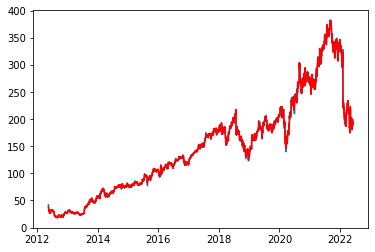

In [51]:
df_full_fb.Date = pd.to_datetime(df_full_fb.Date, format='%Y%m%d')
plt.plot(df_full_fb.Date, df_full_fb.Open)
plt.plot(df_full_fb.Date, df_full_fb.Close, color='red')
plt.show()

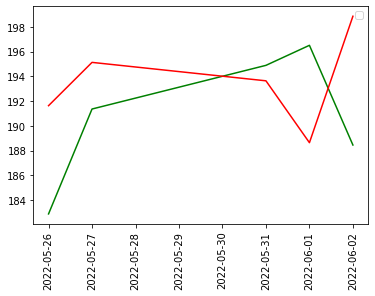

In [54]:
last_5_days_fb = df_full_fb.tail(5)
plt.xlabel='Date'
plt.ylabel='Open & Close Price'
plt.xticks(rotation=90)
plt.legend(['Open', 'Close'])
plt.caption = 'Facebook price (last 5 days)'
plt.plot(last_5_days_fb.Date, last_5_days_fb.Open, color='green')
plt.plot(last_5_days_fb.Date, last_5_days_fb.Close, color='red')
plt.show()

In [9]:
df_full_fb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2527 non-null   datetime64[ns]
 1   Open       2527 non-null   float64       
 2   High       2527 non-null   float64       
 3   Low        2527 non-null   float64       
 4   Close      2527 non-null   float64       
 5   Adj Close  2527 non-null   float64       
 6   Volume     2527 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 138.3 KB


In [10]:
df = yf.Ticker("FB")
df

yfinance.Ticker object <FB>

In [11]:
type(df)

yfinance.ticker.Ticker

## Find out the attributes and properties of the Yahoo Finance Ticker object

In [12]:
dir(df)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_balancesheet',
 '_base_url',
 '_calendar',
 '_cashflow',
 '_download_options',
 '_earnings',
 '_expirations',
 '_financials',
 '_fundamentals',
 '_get_fundamentals',
 '_history',
 '_info',
 '_institutional_holders',
 '_isin',
 '_major_holders',
 '_mutualfund_holders',
 '_news',
 '_options2df',
 '_recommendations',
 '_scrape_url',
 '_shares',
 '_sustainability',
 'actions',
 'analysis',
 'balance_sheet',
 'balancesheet',
 'calendar',
 'cashflow',
 'dividends',
 'earnings',
 'financials',
 'get_actions',
 'get_analysis',
 'get_balance_sheet',
 'get_balancesheet',
 'get_calendar',
 'get_cashflow',
 'get_divid

In [15]:
type(df.info)
df.info

import pprint
pprint.pprint(df.info, indent=4)

{   '52WeekChange': -0.39803237,
    'SandP52WeekChange': -0.01254642,
    'address1': '1601 Willow Road',
    'algorithm': None,
    'annualHoldingsTurnover': None,
    'annualReportExpenseRatio': None,
    'ask': 0,
    'askSize': 800,
    'averageDailyVolume10Day': 29967830,
    'averageVolume': 32868119,
    'averageVolume10days': 29967830,
    'beta': 1.37366,
    'beta3Year': None,
    'bid': 0,
    'bidSize': 900,
    'bookValue': 45.405,
    'category': None,
    'circulatingSupply': None,
    'city': 'Menlo Park',
    'companyOfficers': [],
    'country': 'United States',
    'currency': 'USD',
    'currentPrice': 198.86,
    'currentRatio': 2.811,
    'dateShortInterest': 1652400000,
    'dayHigh': 200.935,
    'dayLow': 187.73,
    'debtToEquity': 11.895,
    'dividendRate': None,
    'dividendYield': None,
    'earningsGrowth': -0.176,
    'earningsQuarterlyGrowth': -0.214,
    'ebitda': 52050001920,
    'ebitdaMargins': 0.43495998,
    'enterpriseToEbitda': 9.507,
    'ent

In [17]:
df.actions

,Dividends,Stock Splits
Date,,


In [38]:
df.balancesheet.reset_index().info()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_balancesheet = df.balancesheet.reset_index()
df_balancesheet.columns
df_balancesheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                23 non-null     object 
 1   2021-12-31 00:00:00  22 non-null     float64
 2   2020-12-31 00:00:00  22 non-null     float64
 3   2019-12-31 00:00:00  22 non-null     float64
 4   2018-12-31 00:00:00  22 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.0+ KB


,index,2021-12-31 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00
0,Intangible Assets,634000000.00,623000000.00,894000000.00,1294000000.00
1,Capital Surplus,55811000000.00,50018000000.00,45851000000.00,42906000000.00
2,Total Liab,41108000000.00,31026000000.00,32322000000.00,13207000000.00
3,Total Stockholder Equity,124879000000.00,128290000000.00,101054000000.00,84127000000.00
4,Other Current Liab,12698000000.00,10018000000.00,11186000000.00,4494000000.00
5,Total Assets,165987000000.00,159316000000.00,133376000000.00,97334000000.00
6,Other Current Assets,149000000.00,241000000.00,8000000.00,10000000.00
7,Retained Earnings,69761000000.00,77345000000.00,55692000000.00,41981000000.00
8,Other Liab,6721000000.00,6414000000.00,7745000000.00,6190000000.00
9,Good Will,19197000000.00,19050000000.00,18715000000.00,18301000000.00


In [39]:
df.analysis.reset_index()

,Period,Max Age,End Date,Growth,Earnings Estimate Avg,Earnings Estimate Low,Earnings Estimate High,Earnings Estimate Year Ago Eps,Earnings Estimate Number Of Analysts,Earnings Estimate Growth,...,Revenue Estimate Growth,Eps Trend Current,Eps Trend 7Days Ago,Eps Trend 30Days Ago,Eps Trend 60Days Ago,Eps Trend 90Days Ago,Eps Revisions Up Last7Days,Eps Revisions Up Last30Days,Eps Revisions Down Last30Days,Eps Revisions Down Last90Days
0,0Q,1,2022-06-30,-0.26,2.66,2.00,3.61,3.61,41.00,-0.26,...,0.05,2.66,2.68,2.70,2.83,2.87,0.00,0.00,1.00,NaN
1,+1Q,1,2022-09-30,-0.14,2.78,1.91,4.04,3.22,39.00,-0.14,...,NaN,2.78,2.79,2.81,2.94,2.98,0.00,0.00,0.00,NaN
2,0Y,1,2022-12-31,-0.14,11.87,9.20,16.02,13.77,52.00,-0.14,...,0.07,11.87,11.93,12.02,12.38,12.47,0.00,0.00,3.00,NaN
3,+1Y,1,2023-12-31,0.18,14.01,9.20,22.12,11.87,53.00,0.18,...,0.17,14.01,14.09,14.20,14.50,14.62,0.00,2.00,3.00,NaN
4,+5Y,1,NaT,0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-5Y,1,NaT,0.42,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get Price History For a given range of dates

In [48]:
start_date = datetime.datetime(2022,5,1)
start_date
end_date = datetime.datetime(2022,5,7)
end_date
df_price_history = df.history(start=start_date, end=end_date)
df_price_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-02,201.17,211.88,200.99,211.13,49915300,0,0
2022-05-03,210.45,214.90,208.09,212.03,41556300,0,0
2022-05-04,210.65,224.30,206.96,223.41,41375900,0,0
2022-05-05,218.74,220.17,206.16,208.28,41129200,0,0
2022-05-06,207.34,209.38,201.02,203.77,34733600,0,0


In [49]:
df_price_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2022-05-02 to 2022-05-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5 non-null      float64
 1   High          5 non-null      float64
 2   Low           5 non-null      float64
 3   Close         5 non-null      float64
 4   Volume        5 non-null      int64  
 5   Dividends     5 non-null      int64  
 6   Stock Splits  5 non-null      int64  
dtypes: float64(4), int64(3)
memory usage: 320.0 bytes
